# Polynomial Regression (Univariate) & Regularization

> * **Authors :** Gabriele Accarino & Marco Chiarelli
> * **Contacts :** gabriele.accarino@unisalento.it, marco.chiarelli@unisalento.it

In [1]:
import numpy as np

import matplotlib.pyplot as plt 
import operator
from matplotlib.pyplot import figure

import pandas as pd  
import seaborn as sns 

%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import time

boston_dataset = load_boston()

In [2]:
print(boston_dataset.keys())
print(type(boston_dataset))

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
<class 'sklearn.utils.Bunch'>


* **data** : contains the information for various houses
* **target** : prices of the house
* **feature_names** : names of the features
* **DESCR** : describes the dataset

## Dataset

In [3]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Features labels

In [4]:
features = boston_dataset.feature_names
print(features)
print(len(features))

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
13


### Target values

In [5]:
target = boston_dataset.target
target_name = 'MEDV'
print(target)
print('\n')
print("The Target name is : {}".format(target_name))

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

### Create the Pandas Dataframe

In [6]:
boston = pd.DataFrame(boston_dataset.data, columns = features)
print(boston.shape)

boston.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Add the target variable to the Dataframe

In [7]:
boston[target_name] = target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Check for NaN values

In [8]:
print(boston.isna().sum())
print("")
print(boston.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


## Plot the 'Pearson' Correlation Matrix

$$\large \rho_{X,Y} = \frac{\sum_{i} (x_{i} - \mu_{X})(y_{i}-\mu_{Y})}{\sqrt{\sum_{j}(x_{j}-\mu_{X})^2 \sum_{k} (y_{k}-\mu_{Y})^2}}$$

$$\large -1 \le \rho_{X,Y} \le 1$$

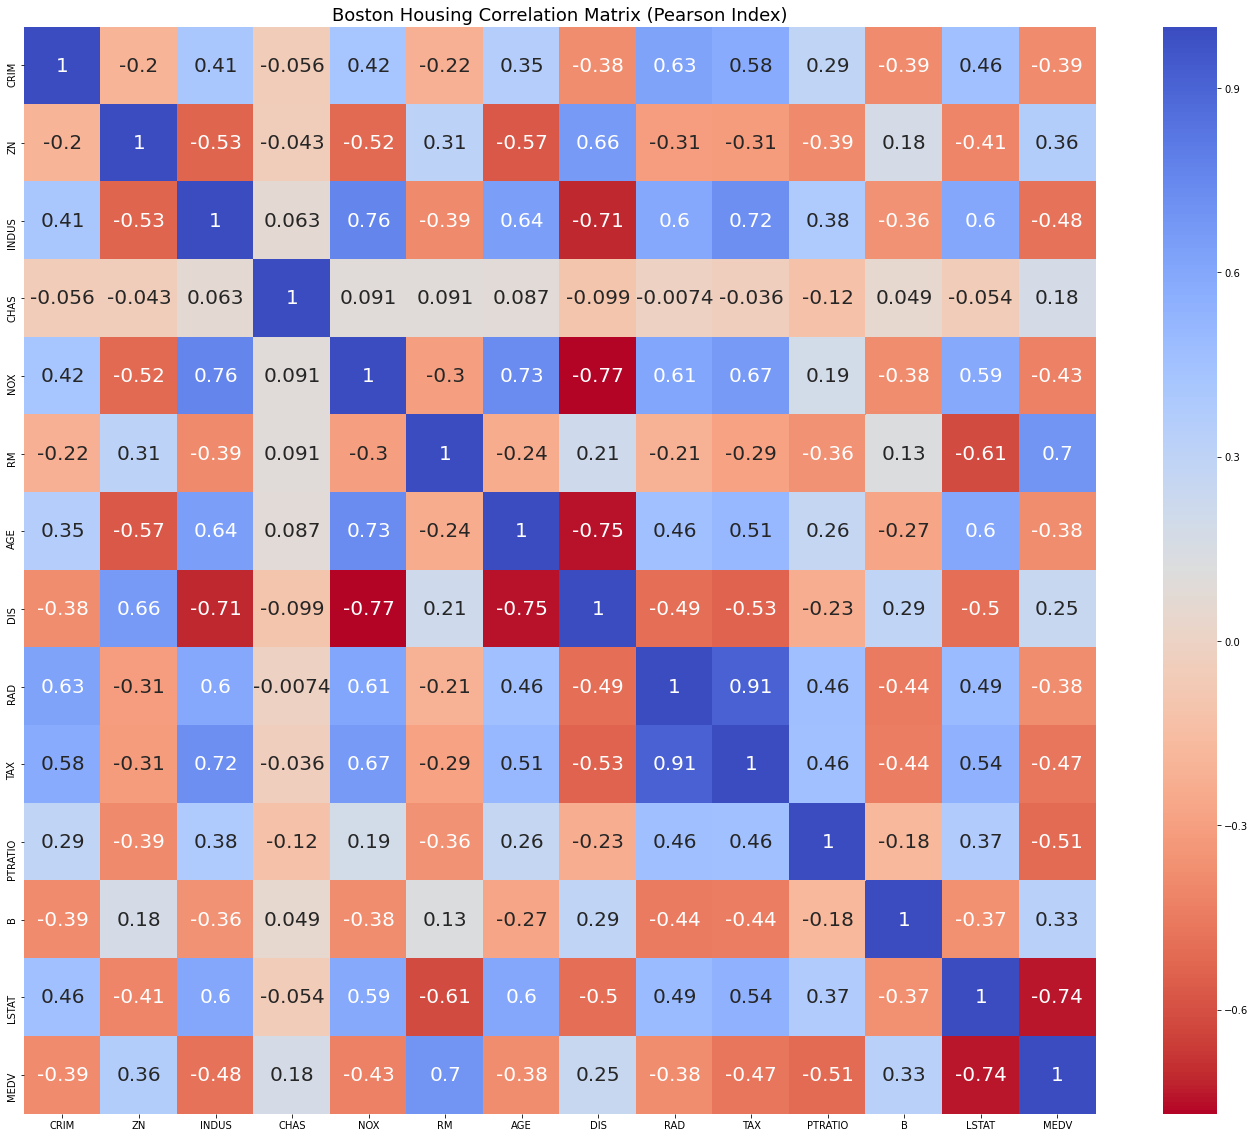

In [9]:
f, (ax1) = plt.subplots(1, 1, figsize=(24,20))
correlation_matrix = boston.corr(method='pearson')
sns.heatmap(correlation_matrix, cmap='coolwarm_r', annot = True, annot_kws={'size':20}, ax=ax1)
ax1.set_title("Boston Housing Correlation Matrix (Pearson Index)", fontsize=18)
plt.show()

### Scatter Plot of LSTAT and RM

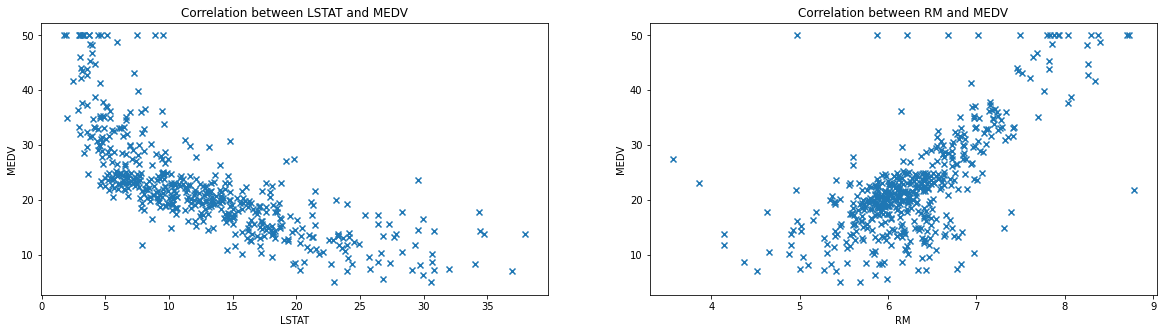

In [10]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='x')
    plt.title("Correlation between {} and {}".format(col, target_name))
    plt.xlabel(col)
    plt.ylabel('MEDV')

# Linear Regression with RM

$$\large h_{\theta}(x) = \theta_0 + \theta_1 x$$

### Supervised Learning

In [11]:
variable = 'RM'

X = np.c_[np.ones((boston.shape[0],1)), boston[variable]]
y = np.array(boston[target_name]).reshape(-1,1)

In [12]:
print(X.shape, y.shape)

(506, 2) (506, 1)


### Normal Equation (Custom)

In [13]:
def normalEquations(X, y):
    start = time.time()
    #theta = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(X), X)), np.transpose(X)), y)
    pinv = np.linalg.pinv(X.T.dot(X))
    theta_ne = pinv.dot(X.T).dot(y)
    end = time.time()
    eta_ne = end-start
    return theta_ne.ravel(), eta_ne

### Linear Regression Model (Sklearn)

In [14]:
def LR(X, y):
    start = time.time()
    regr = LinearRegression()
    regr.fit(X,y)
    end = time.time()
    eta_lr = end - start
    return regr, eta_lr

## Fit the Linear Regression model

In [15]:
theta_ne, _ = normalEquations(X, y)
regr, _ = LR(X, y)

theta_lr = [regr.intercept_[0], regr.coef_.ravel()[1]]

In [16]:
print(theta_ne)
print(theta_lr)

[-34.67062078   9.10210898]
[-34.67062077643864, 9.10210898118031]


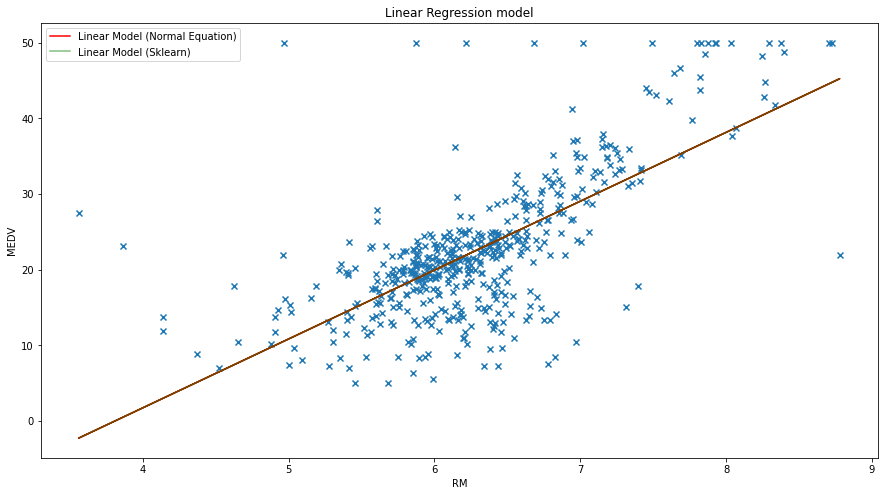

In [17]:
plt.figure(figsize = (15,8))
plt.scatter(X[:,1], y, marker='x')
plt.plot(X[:,1], X.dot(theta_ne), c = 'r', label = 'Linear Model (Normal Equation)')
plt.plot(X[:,1], X.dot(theta_lr), c = 'g', label = 'Linear Model (Sklearn)', alpha = 0.5)
plt.title("Linear Regression model")
plt.xlabel(variable)
plt.ylabel(target_name)
plt.legend()
plt.show()

## Create Polynomial features

* The **polynomial_features()** function accepts a dataframe
* You have to convert the input $X$ that is a numpy array to a Pandas DataFrame

In [18]:
def polynomial_features(dataframe, degree):
    dataframe = dataframe.copy()
    variable = dataframe.columns
    for i in range(1, degree):  
        colname = variable + '**%d'%(i+1)
        dataframe[colname] = dataframe[variable]**(i+1)
    return dataframe

### Back to Pandas DataFrame (select only the RM column)

In [19]:
X_poly = pd.DataFrame(X[:,1], columns = [variable])

In [20]:
X_poly.head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


## Create a Polynomial design matrix of degree 2 up to 6

* Add again the column of ones for the intercept parameter

In [21]:
X_poly_2 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly, 2)]
X_poly_3 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly, 3)]
X_poly_4 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly, 4)]
X_poly_5 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly, 5)]
X_poly_6 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly, 6)]

print(X_poly_2.shape, X_poly_3.shape, X_poly_4.shape, X_poly_5.shape, X_poly_6.shape)

(506, 3) (506, 4) (506, 5) (506, 6) (506, 7)


In [22]:
pd.DataFrame(X_poly_6)

,0,1,2,3,4,5,6
0,1.0,6.575,43.230625,284.241359,1868.886938,12287.931617,80793.150379
1,1.0,6.421,41.229241,264.732956,1699.850313,10914.738863,70083.538237
2,1.0,7.185,51.624225,370.920057,2665.060607,19148.460460,137581.688407
3,1.0,6.998,48.972004,342.706084,2398.257176,16783.003716,117447.460005
4,1.0,7.147,51.079609,365.065966,2609.126456,18647.426778,133273.159183
...,...,...,...,...,...,...,...
501,1.0,6.593,43.467649,286.582210,1889.436510,12457.054908,82129.363007
502,1.0,6.120,37.454400,229.220928,1402.832079,8585.332326,52542.233833
503,1.0,6.976,48.664576,339.484082,2368.240957,16520.848918,115249.442051
504,1.0,6.794,46.158436,313.600414,2130.601214,14475.304648,98345.219776


## Fit the polynomial models

In [23]:
theta_ne_2, _ = normalEquations(X_poly_2, y)
theta_ne_3, _ = normalEquations(X_poly_3, y)
theta_ne_4, _ = normalEquations(X_poly_4, y)
theta_ne_5, _ = normalEquations(X_poly_5, y)
theta_ne_6, _ = normalEquations(X_poly_6, y)

### Print the optimal parameters

In [24]:
print("Optimal theta for polynomial model degree {} : {}".format(2, theta_ne_2))
print("Optimal theta for polynomial model degree {} : {}".format(3, theta_ne_3))
print("Optimal theta for polynomial model degree {} : {}".format(4, theta_ne_4))
print("Optimal theta for polynomial model degree {} : {}".format(5, theta_ne_5))
print("Optimal theta for polynomial model degree {} : {}".format(6, theta_ne_6))

Optimal theta for polynomial model degree 2 : [ 66.05884748 -22.64326237   2.47012384]
Optimal theta for polynomial model degree 3 : [ 241.31081479 -109.3906069    16.49101636   -0.74039373]
Optimal theta for polynomial model degree 4 : [-463.48244414  371.45653923 -103.65850635   12.32148278   -0.52208994]
Optimal theta for polynomial model degree 5 : [-36.19846777 -27.88478691  41.20425026 -13.25276839   1.68059985
  -0.07419176]
Optimal theta for polynomial model degree 6 : [-1.2311892  -2.02923501 -1.05322052  3.99687435 -1.49767441  0.20401741
 -0.00940903]


### Sort input and output before plot

In [25]:
srt_zip_2 = sorted(zip(X[:,1], X_poly_2.dot(theta_ne_2)))
X_2, yhat_2 = zip(*srt_zip_2)

srt_zip_3 = sorted(zip(X[:,1], X_poly_3.dot(theta_ne_3)))
X_3, yhat_3 = zip(*srt_zip_3)

srt_zip_4 = sorted(zip(X[:,1], X_poly_4.dot(theta_ne_4)))
X_4, yhat_4 = zip(*srt_zip_4)

srt_zip_5 = sorted(zip(X[:,1], X_poly_5.dot(theta_ne_5)))
X_5, yhat_5 = zip(*srt_zip_5)

srt_zip_6 = sorted(zip(X[:,1], X_poly_6.dot(theta_ne_6)))
X_6, yhat_6 = zip(*srt_zip_6)

## Visualize the fitted models on the same scatter plot

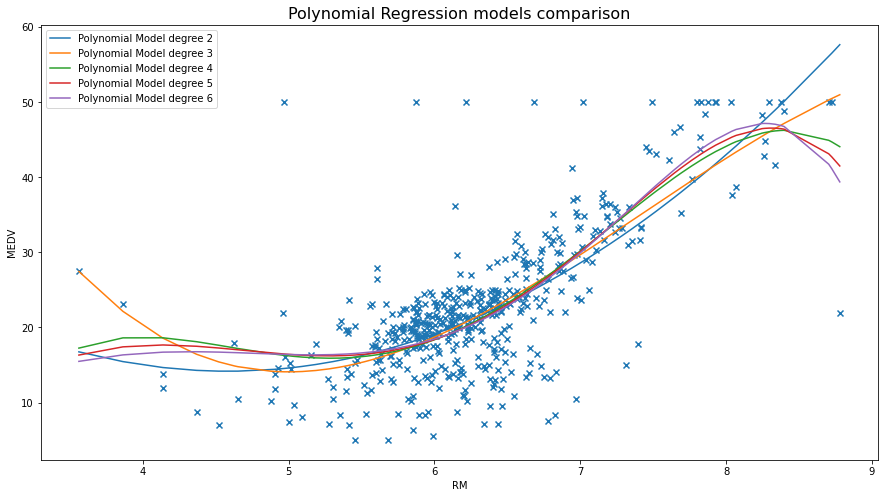

In [26]:
plt.figure(figsize = (15,8))
plt.scatter(X[:,1], y, marker='x')
plt.plot(X_2, yhat_2, label = 'Polynomial Model degree 2')
plt.plot(X_3, yhat_3, label = 'Polynomial Model degree 3')
plt.plot(X_4, yhat_4, label = 'Polynomial Model degree 4')
plt.plot(X_5, yhat_5, label = 'Polynomial Model degree 5')
plt.plot(X_6, yhat_6, label = 'Polynomial Model degree 6')
plt.title("Polynomial Regression models comparison", fontsize = 16)
plt.xlabel(variable)
plt.ylabel(target_name)
plt.legend()
plt.show()

## Outliers Detection and Removal (only RM feature is considered)

In [27]:
input_feature = 'RM'
output_feature = 'MEDV'

In [28]:
# Only RM feature
X_1 = pd.DataFrame(X[:,1], columns = [input_feature])

print(X_1.shape)

(506, 1)


In [29]:
X_1.head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [30]:
from scipy import stats

# X without outliers
X_in_3 = X_1[(np.abs(stats.zscore(X_1)) < 3).all(axis=1)]
print("Number of inliers (Z-score method); threshold ({}) : {}".format(3, X_in_3.shape[0]))

X_out_3 = X_1[~(np.abs(stats.zscore(X_1)) < 3).all(axis=1)]
print("Number of outliers (Z-score method); threshold ({}) : {}".format(3, X_out_3.shape[0]))

X_in_2_9 = X_1[(np.abs(stats.zscore(X_1)) < 2.9).all(axis=1)]
print("Number of inliers (Z-score method); threshold ({}) : {}".format(2.9, X_in_2_9.shape[0]))

X_out_2_9 = X_1[~(np.abs(stats.zscore(X_1)) < 2.9).all(axis=1)]
print("Number of outliers (Z-score method); threshold ({}) : {}".format(2.9, X_out_2_9.shape[0]))

Number of inliers (Z-score method); threshold (3) : 498
Number of outliers (Z-score method); threshold (3) : 8
Number of inliers (Z-score method); threshold (2.9) : 496
Number of outliers (Z-score method); threshold (2.9) : 10


In [31]:
X_out_3

,RM
225,8.725
257,8.704
262,8.398
364,8.780
365,3.561
367,3.863
374,4.138
406,4.138


In [32]:
y_in_3 = target[X_in_3.index]
y_out_3 = target[X_out_3.index]
y_in_2_9 = target[X_in_2_9.index]
y_out_2_9 = target[X_out_2_9.index]

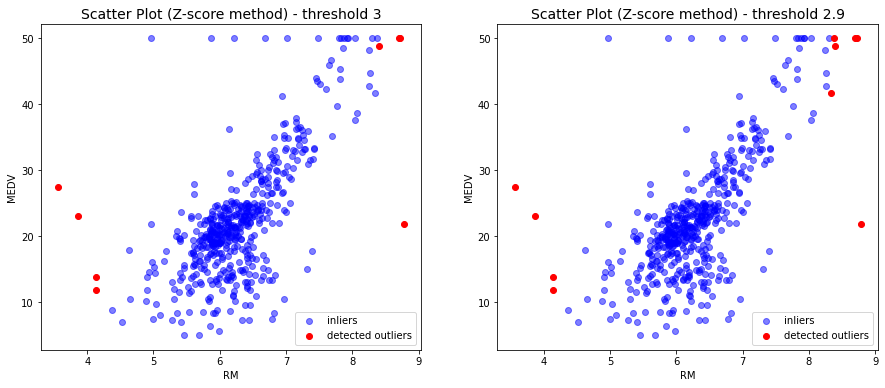

In [33]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
# for single feature
ax1.scatter(X_in_3, y_in_3, label = 'inliers', c = 'blue', alpha = 0.5)
ax1.scatter(X_out_3, y_out_3, label = 'detected outliers', c = 'r')

ax1.set_xlabel(input_feature)
ax1.set_ylabel(output_feature)
ax1.set_title('Scatter Plot (Z-score method) - threshold 3', fontsize = 14)
ax1.legend()

ax2 = fig.add_subplot(122)
# for single feature
ax2.scatter(X_in_2_9, y_in_2_9, label = 'inliers', c = 'blue', alpha = 0.5)
ax2.scatter(X_out_2_9, y_out_2_9, label = 'detected outliers', c = 'r')

ax2.set_xlabel(input_feature)
ax2.set_ylabel(output_feature)
ax2.set_title('Scatter Plot (Z-score method) - threshold 2.9', fontsize = 14)
ax2.legend()

plt.show()

## Outliers Detection and Removal (the RM feature is considered along with the target MEDV)

In [34]:
# RM feature along with the target (MEDV)
X_2 = pd.DataFrame(np.c_[X[:,1], target], columns = [input_feature, output_feature])

print(X_2.shape)

(506, 2)


In [35]:
X_2.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [36]:
from scipy import stats

# X without outliers
X_in_3 = X_2[(np.abs(stats.zscore(X_2)) < 3).all(axis=1)]
print("Number of inliers (Z-score method); threshold ({}) : {}".format(3, X_in_3.shape[0]))

X_out_3 = X_2[~(np.abs(stats.zscore(X_2)) < 3).all(axis=1)]
print("Number of outliers (Z-score method); threshold ({}) : {}".format(3, X_out_3.shape[0]))

X_in_2_9 = X_2[(np.abs(stats.zscore(X_2)) < 2.9).all(axis=1)]
print("Number of inliers (Z-score method); threshold ({}) : {}".format(2.9, X_in_2_9.shape[0]))

X_out_2_9 = X_2[~(np.abs(stats.zscore(X_2)) < 2.9).all(axis=1)]
print("Number of outliers (Z-score method); threshold ({}) : {}".format(2.9, X_out_2_9.shape[0]))

Number of inliers (Z-score method); threshold (3) : 498
Number of outliers (Z-score method); threshold (3) : 8
Number of inliers (Z-score method); threshold (2.9) : 483
Number of outliers (Z-score method); threshold (2.9) : 23


In [37]:
X_in_2_9

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
...,...,...
501,6.593,22.4
502,6.120,20.6
503,6.976,23.9
504,6.794,22.0


In [38]:
X_out_3

,RM,MEDV
225,8.725,50.0
257,8.704,50.0
262,8.398,48.8
364,8.780,21.9
365,3.561,27.5
367,3.863,23.1
374,4.138,13.8
406,4.138,11.9


In [39]:
X_out_2_9

,RM,MEDV
161,7.489,50.0
162,7.802,50.0
163,8.375,50.0
166,7.929,50.0
186,7.831,50.0
195,7.875,50.0
204,8.034,50.0
225,8.725,50.0
232,8.337,41.7
257,8.704,50.0


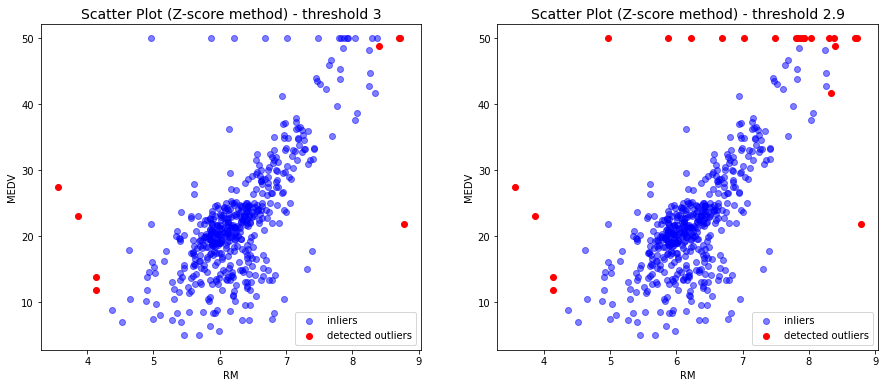

In [40]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)

# for both feature and target
ax1.scatter(X_in_3[input_feature], X_in_3[output_feature], label = 'inliers', c = 'blue', alpha = 0.5)
ax1.scatter(X_out_3[input_feature], X_out_3[output_feature], label = 'detected outliers', c = 'r')

ax1.set_xlabel(input_feature)
ax1.set_ylabel(output_feature)
ax1.set_title('Scatter Plot (Z-score method) - threshold 3', fontsize = 14)
ax1.legend()

ax2 = fig.add_subplot(122)

# for both feature and target
ax2.scatter(X_in_2_9[input_feature], X_in_2_9[output_feature], label = 'inliers', c = 'blue', alpha = 0.5)
ax2.scatter(X_out_2_9[input_feature], X_out_2_9[output_feature], label = 'detected outliers', c = 'r')

ax2.set_xlabel(input_feature)
ax2.set_ylabel(output_feature)
ax2.set_title('Scatter Plot (Z-score method) - threshold 2.9', fontsize = 14)
ax2.legend()

plt.show()

# Fitting polynomial models on the inliers dataset 

* You can use **$X\_in\_2\_9$** or **$X\_in\_3$** as input

In [41]:
#X_clean = pd.DataFrame(X_in_3[input_feature], columns = [input_feature])
#y_clean = pd.DataFrame(X_in_3[output_feature], columns = [output_feature])

X_clean = pd.DataFrame(X_in_2_9[input_feature], columns = [input_feature])
y_clean = pd.DataFrame(X_in_2_9[output_feature], columns = [output_feature])

print(X_clean.shape, y_clean.shape)

(483, 1) (483, 1)


## Add the column of ones and compute the poly features

In [42]:
X_poly_2_clean = np.c_[np.ones((X_clean.shape[0], 1)), polynomial_features(X_clean, 2)]
X_poly_3_clean = np.c_[np.ones((X_clean.shape[0], 1)), polynomial_features(X_clean, 3)]
X_poly_4_clean = np.c_[np.ones((X_clean.shape[0], 1)), polynomial_features(X_clean, 4)]
X_poly_5_clean = np.c_[np.ones((X_clean.shape[0], 1)), polynomial_features(X_clean, 5)]
X_poly_6_clean = np.c_[np.ones((X_clean.shape[0], 1)), polynomial_features(X_clean, 6)]

print(X_poly_2_clean.shape, X_poly_3_clean.shape, X_poly_4_clean.shape, X_poly_5_clean.shape, X_poly_6_clean.shape)

(483, 3) (483, 4) (483, 5) (483, 6) (483, 7)


## Fit the polynomial models on the inliers dataset

In [43]:
theta_ne_2_clean, _ = normalEquations(X_poly_2_clean, y_clean)
theta_ne_3_clean, _ = normalEquations(X_poly_3_clean, y_clean)
theta_ne_4_clean, _ = normalEquations(X_poly_4_clean, y_clean)
theta_ne_5_clean, _ = normalEquations(X_poly_5_clean, y_clean)
theta_ne_6_clean, _ = normalEquations(X_poly_6_clean, y_clean)

## Print the optimal parameters

In [44]:
print("Optimal theta for polynomial model degree {} : {}".format(2, theta_ne_2_clean))
print("Optimal theta for polynomial model degree {} : {}".format(3, theta_ne_3_clean))
print("Optimal theta for polynomial model degree {} : {}".format(4, theta_ne_4_clean))
print("Optimal theta for polynomial model degree {} : {}".format(5, theta_ne_5_clean))
print("Optimal theta for polynomial model degree {} : {}".format(6, theta_ne_6_clean))

Optimal theta for polynomial model degree 2 : [ 67.71840486 -23.86962881   2.6135645 ]
Optimal theta for polynomial model degree 3 : [23.96034665 -2.75909772 -0.74314649  0.17590673]
Optimal theta for polynomial model degree 4 : [-1.66052861e+03  1.09153005e+03 -2.64325160e+02  2.80850171e+01
 -1.09632919e+00]
Optimal theta for polynomial model degree 5 : [-164.54615921 -153.26295018  145.69086373  -38.75590452    4.29761006
   -0.17240828]
Optimal theta for polynomial model degree 6 : [-12.41426365 -23.50335672 -21.87001859  22.09927109  -5.98494602
   0.66897457  -0.0269963 ]


## Sort input and output before plot

## Compares the models: Original dataset Vs Inliers Dataset

In [45]:
srt_zip_2 = sorted(zip(X[:,1], X_poly_2.dot(theta_ne_2)))
X_2, yhat_2 = zip(*srt_zip_2)

srt_zip_3 = sorted(zip(X[:,1], X_poly_3.dot(theta_ne_3)))
X_3, yhat_3 = zip(*srt_zip_3)

srt_zip_4 = sorted(zip(X[:,1], X_poly_4.dot(theta_ne_4)))
X_4, yhat_4 = zip(*srt_zip_4)

srt_zip_5 = sorted(zip(X[:,1], X_poly_5.dot(theta_ne_5)))
X_5, yhat_5 = zip(*srt_zip_5)

srt_zip_6 = sorted(zip(X[:,1], X_poly_6.dot(theta_ne_6)))
X_6, yhat_6 = zip(*srt_zip_6)

In [46]:
srt_zip_2_clean = sorted(zip(X_clean.values, X_poly_2_clean.dot(theta_ne_2_clean)))
X_2_clean, yhat_2_clean = zip(*srt_zip_2_clean)

srt_zip_3_clean = sorted(zip(X_clean.values, X_poly_3_clean.dot(theta_ne_3_clean)))
X_3_clean, yhat_3_clean = zip(*srt_zip_3_clean)

srt_zip_4_clean = sorted(zip(X_clean.values, X_poly_4_clean.dot(theta_ne_4_clean)))
X_4_clean, yhat_4_clean = zip(*srt_zip_4_clean)

srt_zip_5_clean = sorted(zip(X_clean.values, X_poly_5_clean.dot(theta_ne_5_clean)))
X_5_clean, yhat_5_clean = zip(*srt_zip_5_clean)

srt_zip_6_clean = sorted(zip(X_clean.values, X_poly_6_clean.dot(theta_ne_6_clean)))
X_6_clean, yhat_6_clean = zip(*srt_zip_6_clean)

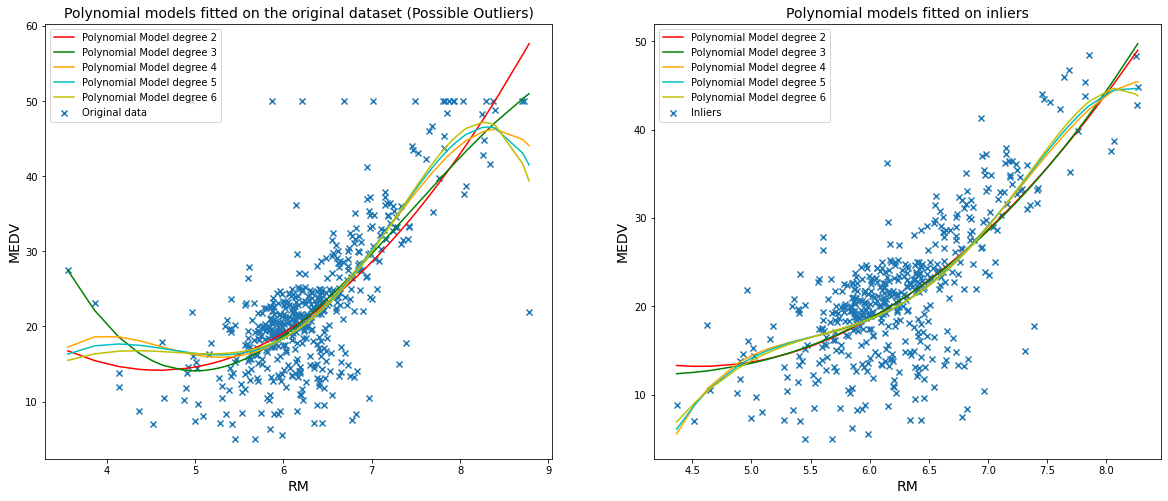

In [47]:
fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(121)

# for both feature and target
ax1.scatter(X[:,1], y, marker='x', label = 'Original data')
ax1.plot(X_2, yhat_2, label = 'Polynomial Model degree 2', c = 'r')
ax1.plot(X_3, yhat_3, label = 'Polynomial Model degree 3', c = 'g')
ax1.plot(X_4, yhat_4, label = 'Polynomial Model degree 4', c = 'orange')
ax1.plot(X_5, yhat_5, label = 'Polynomial Model degree 5', c = 'c')
ax1.plot(X_6, yhat_6, label = 'Polynomial Model degree 6', c = 'y')

#ax1.plot(X_2_clean, yhat_2_clean, label = 'Polynomial Model degree 2', c = 'r')
#ax1.plot(X_3_clean, yhat_3_clean, label = 'Polynomial Model degree 3', c = 'g')
#ax1.plot(X_4_clean, yhat_4_clean, label = 'Polynomial Model degree 4', c = 'orange')
#ax1.plot(X_5_clean, yhat_5_clean, label = 'Polynomial Model degree 5', c = 'c')
#ax1.plot(X_6_clean, yhat_6_clean, label = 'Polynomial Model degree 6', c = 'y')

ax1.set_xlabel(input_feature, fontsize = 14)
ax1.set_ylabel(output_feature, fontsize = 14)
ax1.set_title('Polynomial models fitted on the original dataset (Possible Outliers)', fontsize = 14)
ax1.legend()

ax2 = fig.add_subplot(122)

ax2.scatter(X_clean, y_clean, marker='x', label = 'Inliers')
ax2.plot(X_2_clean, yhat_2_clean, label = 'Polynomial Model degree 2', c = 'r')
ax2.plot(X_3_clean, yhat_3_clean, label = 'Polynomial Model degree 3', c = 'g')
ax2.plot(X_4_clean, yhat_4_clean, label = 'Polynomial Model degree 4', c = 'orange')
ax2.plot(X_5_clean, yhat_5_clean, label = 'Polynomial Model degree 5', c = 'c')
ax2.plot(X_6_clean, yhat_6_clean, label = 'Polynomial Model degree 6', c = 'y')

ax2.set_xlabel(input_feature, fontsize = 14)
ax2.set_ylabel(output_feature, fontsize = 14)
ax2.set_title('Polynomial models fitted on inliers', fontsize = 14)
ax2.legend()

plt.show()

# Regularization

### Regularized Cost Function

$$\large h_{\theta}(x) = \theta_0 + \theta_1 x = X\theta$$

$$\large J(\theta) = \frac{1}{2m}\sum_{i = 1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2 + \frac{\lambda}{2m}\sum_{j = 1}^{n} \theta_{j}^2$$

$$\large J(\theta) = \frac{1}{2m} (X\theta - y)^{T}(X\theta - y) + \frac{\lambda}{2m} (\theta_r^T\theta_r)$$

$$\theta_{r} = \begin{bmatrix}
    0 \\
    \theta_1\\
    \vdots \\
    \theta_{n+1}
\end{bmatrix}$$

### Regularized Gradient

$$ \large \frac{\partial J(\theta)}{\partial\theta_{0}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{0}$$ 

$$ \large \frac{\partial J(\theta)}{\partial\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} + \frac{\lambda}{m}\theta_j$$ 

### Regularized Gradient (Vectorized)

$$ \large \frac{\partial J(\theta)}{\partial\theta_{0}} = \frac{1}{m} X^T(X\theta-y)$$
$$ \large \frac{\partial J(\theta)}{\partial\theta_{j}} = \frac{1}{m} X^T(X\theta-y) + \frac{\lambda}{m}\theta_{r}$$
$$\theta_{r} = \begin{bmatrix}
    0 \\
    \theta_1\\
    \vdots \\
    \theta_{n+1}
\end{bmatrix}$$

### Regularized Gradient Descent Update Rule

$$\large \theta_j := \theta_j - \frac{\alpha}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} - \frac{\alpha\lambda}{m}\theta_j$$

$$\large \theta_j := \theta_j \Big(1 - \frac{\alpha\lambda}{m}\Big) - \frac{\alpha}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j}$$

## Cost Function Vectorized with Regularization - Implementation

In [ ]:
def computeCostVectorizedReg(X, y, lambda_reg = 0.0, theta=np.zeros((X.shape[1], 1))):
    m = y.size

    start = time.time()
    h = X.dot(theta)
    
    # vectorized implementation
    J = (1/(2*m))*((h-y).T.dot(h-y)) + (lambda_reg/(2*m))*(theta[1:].T.dot(theta[1:]))
    end = time.time()
    eta = end-start
    return J[0][0], eta 

In [ ]:
lambda_reg = 1.

theta_poly_2 = np.zeros((X_poly_2_clean.shape[1], 1))
theta_poly_3 = np.zeros((X_poly_3_clean.shape[1], 1))
theta_poly_4 = np.zeros((X_poly_4_clean.shape[1], 1))
theta_poly_5 = np.zeros((X_poly_5_clean.shape[1], 1))
theta_poly_6 = np.zeros((X_poly_6_clean.shape[1], 1))

J_poly_2, _ = computeCostVectorizedReg(X_poly_2_clean, y_clean.values, lambda_reg, theta = theta_poly_2)
J_poly_3, _ = computeCostVectorizedReg(X_poly_3_clean, y_clean.values, lambda_reg, theta = theta_poly_3)
J_poly_4, _ = computeCostVectorizedReg(X_poly_4_clean, y_clean.values, lambda_reg, theta = theta_poly_4)
J_poly_5, _ = computeCostVectorizedReg(X_poly_5_clean, y_clean.values, lambda_reg, theta = theta_poly_5)
J_poly_6, _ = computeCostVectorizedReg(X_poly_6_clean, y_clean.values, lambda_reg, theta = theta_poly_6)

In [ ]:
print("Cost J for polynomial input degree {} : {}".format(X_poly_2_clean.shape[1]-1, J_poly_2))
print("Cost J for polynomial input degree {} : {}".format(X_poly_3_clean.shape[1]-1, J_poly_3))
print("Cost J for polynomial input degree {} : {}".format(X_poly_4_clean.shape[1]-1, J_poly_4))
print("Cost J for polynomial input degree {} : {}".format(X_poly_5_clean.shape[1]-1, J_poly_5))
print("Cost J for polynomial input degree {} : {}".format(X_poly_6_clean.shape[1]-1, J_poly_6))

## Gradient Descent Vectorized with Regularization implementation

In [ ]:
def gradientDescentVectorizedReg(X, y, lambda_reg = 0.0, theta=np.zeros((X.shape[1],1)), alpha=0.01, num_iters=1500, early = False):
    m = y.size
    J_history = np.zeros(num_iters)
    
    start = time.time()
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        
        # ! simoultaneusly update all the parameters 
        # vectorized implementation
        theta = theta - (alpha*(1/m)*(X.T.dot(h-y)) + ((alpha*lambda_reg)/m) * np.r_[[[0]], theta[1:].reshape(-1,1)])
        J_history[iter], _ = computeCostVectorizedReg(X, y, lambda_reg, theta)
        
        # early stopping
        if (early == True) & (J_history[iter] == J_history[iter-1]):
            break
            
    end = time.time()
    eta = end - start
    return(theta.ravel(), J_history[J_history != 0], eta)

## Feature scaling

In [ ]:
def featureScaling(X):
    X_scaled = X
    
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    maxima = np.amax(X, axis = 0)
    minima = np.amin(X, axis = 0)
    
    for j in range(X.shape[1]):
        X_scaled[:,j] = (X[:,j]-mu[j])/sigma[j]
        #X_scaled[:,j] = (X[:,j]-mu[j])/(maxima[j] - minima[j])
    
    return X_scaled, mu, sigma, maxima, minima

In [ ]:
X_scaled_poly_2, mu_poly_2, sigma_poly_2, maxima_poly_2, minima_poly_2 = featureScaling(X_poly_2_clean[:, 1:])
X_scaled_poly_3, mu_poly_3, sigma_poly_3, maxima_poly_3, minima_poly_3 = featureScaling(X_poly_3_clean[:, 1:])
X_scaled_poly_4, mu_poly_4, sigma_poly_4, maxima_poly_4, minima_poly_4 = featureScaling(X_poly_4_clean[:, 1:])
X_scaled_poly_5, mu_poly_5, sigma_poly_5, maxima_poly_5, minima_poly_5 = featureScaling(X_poly_5_clean[:, 1:])
X_scaled_poly_6, mu_poly_6, sigma_poly_6, maxima_poly_6, minima_poly_6 = featureScaling(X_poly_6_clean[:, 1:])

In [ ]:
X_scaled_poly_2 = np.c_[np.ones((X_scaled_poly_2.shape[0], 1)), X_scaled_poly_2]
X_scaled_poly_3 = np.c_[np.ones((X_scaled_poly_3.shape[0], 1)), X_scaled_poly_3]
X_scaled_poly_4 = np.c_[np.ones((X_scaled_poly_4.shape[0], 1)), X_scaled_poly_4]
X_scaled_poly_5 = np.c_[np.ones((X_scaled_poly_5.shape[0], 1)), X_scaled_poly_5]
X_scaled_poly_6 = np.c_[np.ones((X_scaled_poly_6.shape[0], 1)), X_scaled_poly_6]

## Fitting polynomial models after feature scaling

In [ ]:
lambda_reg = 0.0
alpha = 0.01
num_iters = 10000
early = False

theta_poly_2 = np.zeros((X_scaled_poly_2.shape[1], 1))
theta_poly_3 = np.zeros((X_scaled_poly_3.shape[1], 1))
theta_poly_4 = np.zeros((X_scaled_poly_4.shape[1], 1))
theta_poly_5 = np.zeros((X_scaled_poly_5.shape[1], 1))
theta_poly_6 = np.zeros((X_scaled_poly_6.shape[1], 1))

theta_poly_2_opt, J_poly_2, _ = gradientDescentVectorizedReg(X_scaled_poly_2, y_clean.values, lambda_reg = lambda_reg, theta = theta_poly_2, alpha=alpha, num_iters=num_iters, early = early)
theta_poly_3_opt, J_poly_3, _ = gradientDescentVectorizedReg(X_scaled_poly_3, y_clean.values, lambda_reg = lambda_reg, theta = theta_poly_3, alpha=alpha, num_iters=num_iters, early = early)
theta_poly_4_opt, J_poly_4, _ = gradientDescentVectorizedReg(X_scaled_poly_4, y_clean.values, lambda_reg = lambda_reg, theta = theta_poly_4, alpha=alpha, num_iters=num_iters, early = early)
theta_poly_5_opt, J_poly_5, _ = gradientDescentVectorizedReg(X_scaled_poly_5, y_clean.values, lambda_reg = lambda_reg, theta = theta_poly_5, alpha=alpha, num_iters=num_iters, early = early)
theta_poly_6_opt, J_poly_6, _ = gradientDescentVectorizedReg(X_scaled_poly_6, y_clean.values, lambda_reg = lambda_reg, theta = theta_poly_6, alpha=alpha, num_iters=num_iters, early = early)

In [ ]:
print("Optimal theta found by GD for polynomial model degree {} for lambda {} : {}".format(X_scaled_poly_2.shape[1]-1, lambda_reg, theta_poly_2_opt))
print("Optimal theta found by GD for polynomial model degree {} for lambda {} : {}".format(X_scaled_poly_3.shape[1]-1, lambda_reg, theta_poly_3_opt))
print("Optimal theta found by GD for polynomial model degree {} for lambda {} : {}".format(X_scaled_poly_4.shape[1]-1, lambda_reg, theta_poly_4_opt))
print("Optimal theta found by GD for polynomial model degree {} for lambda {} : {}".format(X_scaled_poly_5.shape[1]-1, lambda_reg, theta_poly_5_opt))
print("Optimal theta found by GD for polynomial model degree {} for lambda {} : {}".format(X_scaled_poly_6.shape[1]-1, lambda_reg, theta_poly_6_opt))

In [ ]:
lambda_reg = 0.1
alpha = 0.01
num_iters = 10000
early = False

theta_poly_2 = np.zeros((X_scaled_poly_2.shape[1], 1))
theta_poly_3 = np.zeros((X_scaled_poly_3.shape[1], 1))
theta_poly_4 = np.zeros((X_scaled_poly_4.shape[1], 1))
theta_poly_5 = np.zeros((X_scaled_poly_5.shape[1], 1))
theta_poly_6 = np.zeros((X_scaled_poly_6.shape[1], 1))

theta_poly_2_opt_reg, J_poly_2_reg, _ = gradientDescentVectorizedReg(X_scaled_poly_2, y_clean.values, lambda_reg = lambda_reg, theta = theta_poly_2, alpha=alpha, num_iters=num_iters, early = early)
theta_poly_3_opt_reg, J_poly_3_reg, _ = gradientDescentVectorizedReg(X_scaled_poly_3, y_clean.values, lambda_reg = lambda_reg, theta = theta_poly_3, alpha=alpha, num_iters=num_iters, early = early)
theta_poly_4_opt_reg, J_poly_4_reg, _ = gradientDescentVectorizedReg(X_scaled_poly_4, y_clean.values, lambda_reg = lambda_reg, theta = theta_poly_4, alpha=alpha, num_iters=num_iters, early = early)
theta_poly_5_opt_reg, J_poly_5_reg, _ = gradientDescentVectorizedReg(X_scaled_poly_5, y_clean.values, lambda_reg = lambda_reg, theta = theta_poly_5, alpha=alpha, num_iters=num_iters, early = early)
theta_poly_6_opt_reg, J_poly_6_reg, _ = gradientDescentVectorizedReg(X_scaled_poly_6, y_clean.values, lambda_reg = lambda_reg, theta = theta_poly_6, alpha=alpha, num_iters=num_iters, early = early)

In [ ]:
print("Optimal theta found by GD for polynomial model degree {} for lambda {} : {}".format(X_scaled_poly_2.shape[1]-1, lambda_reg, theta_poly_2_opt_reg))
print("Optimal theta found by GD for polynomial model degree {} for lambda {} : {}".format(X_scaled_poly_3.shape[1]-1, lambda_reg, theta_poly_3_opt_reg))
print("Optimal theta found by GD for polynomial model degree {} for lambda {} : {}".format(X_scaled_poly_4.shape[1]-1, lambda_reg, theta_poly_4_opt_reg))
print("Optimal theta found by GD for polynomial model degree {} for lambda {} : {}".format(X_scaled_poly_5.shape[1]-1, lambda_reg, theta_poly_5_opt_reg))
print("Optimal theta found by GD for polynomial model degree {} for lambda {} : {}".format(X_scaled_poly_6.shape[1]-1, lambda_reg, theta_poly_6_opt_reg))

### The shrink factor 

$$\large \Big(1 - \frac{\alpha \lambda}{m} \Big)$$

In [ ]:
print(1-(alpha*lambda_reg)/X_scaled_poly_2.shape[0])